In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# Make a color palette for the swarmplot that colors replicates differently.
greys = sns.color_palette('Greys', n_colors=8)
greens = sns.color_palette('Greens', n_colors=8)
purples = sns.color_palette('Purples', n_colors=8)
reddish_purple = sns.set_hls_values(sns.xkcd_rgb['reddish purple'], 0.9, 0.3, 1)
reddish = sns.xkcd_rgb['raspberry']

In [3]:
# Endpoint data (~4 days) from matched 3mL cultures in 10% CO2 and ambient. 
# Matched cultures in 10% and ambient CO2. 
matched_od_df = pd.read_csv('data/fig3/020420_CCMB1_mutants_endpoint.csv')
amb_df = matched_od_df[matched_od_df.condition == 'ambient']
highCO2_df = matched_od_df[matched_od_df.condition == '10% CO2']

In [4]:
matched_od_df.short_name.unique()

array(['pos', 'ls/AGFP', 'ls/pCCM 13.6', 'full CCM pre', 'full CCM post',
       'csos2 dNTD', 'cbbL Y72R', 'csosCA C173S', 'dcsos4AB', 'DabA1-',
       'cbbQ-', 'dacRAF', 'lsK194M/AGFP', 'full CCM K194M'], dtype=object)

In [5]:
# Calculate mean values for the 3mL scale experiment. 
mean_10pct = highCO2_df.groupby('short_name').mean()
mean_amb = amb_df.groupby('short_name').mean()

std_10pct = highCO2_df.groupby('short_name').std()
std_amb = amb_df.groupby('short_name').std()

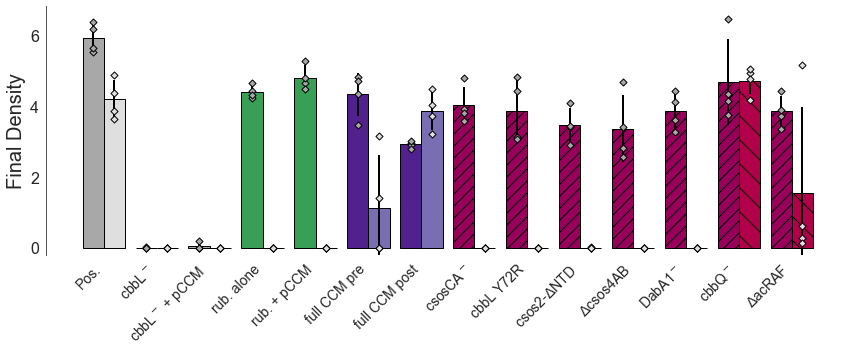

In [12]:
# Presentation version of the genetic tests of the CCM.
# Skipping a few of the controls that are not needed. 

plt.figure(figsize=(12,5))
sns.set_style('white')

custom_pal = {'10% CO2': greys[3], 'ambient': greys[1]}

order = ['pos', # pos control
         'lsK194M/AGFP', 'full CCM K194M', # negatives
         'ls/AGFP', 'ls/pCCM 13.6', # rubisco alone
         'full CCM pre', 'full CCM post', # full CCM +/- evolution
         # mutants with well-understood expected phenotypes 
         'csosCA C173S', 'cbbL Y72R', 'csos2 dNTD', 'dcsos4AB', 'DabA1-',
         # mutants with uncertain expected phenotypes
         'cbbQ-', 'dacRAF', ]
ticknames = ['Pos.', 
             'cbbL$^-$', 'cbbL$^-$ + pCCM', 
             'rub. alone', 'rub. + pCCM', 
             'full CCM pre', 'full CCM post',
             'csosCA$^-$', 'cbbL Y72R', 'csos2-$\Delta$NTD', '$\Delta$csos4AB', 'DabA1$^-$',
             'cbbQ$^-$', '$\Delta$acRAF'] 
bars_10pct = [
    greys[3], greys[3], greys[3], # controls - grey
    # Rubisco alone/no carboxysome - green
    greens[-3], greens[-3],
    # Full CCM gene set
    purples[-1], purples[-1],
    # Mutants with most of the CCM are red/purple
    reddish_purple, reddish_purple, reddish_purple, reddish_purple, reddish_purple,
    reddish_purple, reddish_purple]

bars_amb = [
    greys[1], greys[1], greys[1],
    greens[-5], greens[-5],
    purples[-3], purples[-3],
    reddish, reddish, reddish, reddish, reddish,
    reddish, reddish]

xs = np.arange(len(order))

width = 0.4
offset = width/2
bars_10pct = plt.bar(xs-offset, mean_10pct.loc[order].OD.values, color=bars_10pct, width=width, edgecolor='k')
bars_amb = plt.bar(xs+offset, mean_amb.loc[order].OD.values, color=bars_amb, width=width, edgecolor='k')

for bar in bars_10pct[-7:]:
    bar.set_hatch('//')
for bar in bars_amb[-7:]:
    bar.set_hatch("\\")

for i, name in enumerate(order):
    my_xs = np.ones(4)*i
    plt.scatter(my_xs-offset, highCO2_df[highCO2_df.short_name == name].OD.values,
                marker='D', s=25, color=greys[3], edgecolors='k', zorder=10)
    plt.scatter(my_xs+offset, amb_df[amb_df.short_name == name].OD.values,
                marker='D', s=25, color=greys[1], edgecolors='k', zorder=10)

# TODO: prefer 95% CI to std deviation
plt.errorbar(xs-0.2, mean_10pct.loc[order].OD.values, yerr=std_10pct.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.errorbar(xs+0.2, mean_amb.loc[order].OD.values, yerr=std_amb.loc[order].OD.values, color='k', ls='', elinewidth=2)

plt.xticks(np.arange(len(ticknames)), ticknames, rotation=45, fontsize=14, ha='right')
plt.yticks(np.arange(0, 6.1, 2.0), fontsize=16)
plt.xlabel('')
plt.ylabel('Final Density', fontsize=20)
plt.ylim(-0.2, 6.8)
sns.despine(bottom=True)
plt.tight_layout()

plt.show()